In [940]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

#Chamando os DataFrames de treino e teste
train = pd.read_csv('.../train.csv')
test = pd.read_csv('.../test.csv')

#Removendo as colunas "casual" e "registered" pois não serão usadas
tr_mo = train.drop(columns=['casual', 'registered'])
ts = test

tr_mo.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [941]:
ts.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [942]:
#Ferificando as informações das colunas dos DataFrames
#train.info()
#test.info()

In [943]:
#Ferificando a descrição das colunas dos DataFrames
#train.describe()
#test.describe()

In [944]:
#Ferificando se há linhas repetidas nos DataFrames
#duplicados = train[train.duplicated(keep='first')]
#duplicados = test[test.duplicated(keep='first')]
#duplicados

In [945]:
#train.isnull().sum()
#test.isnull().sum()

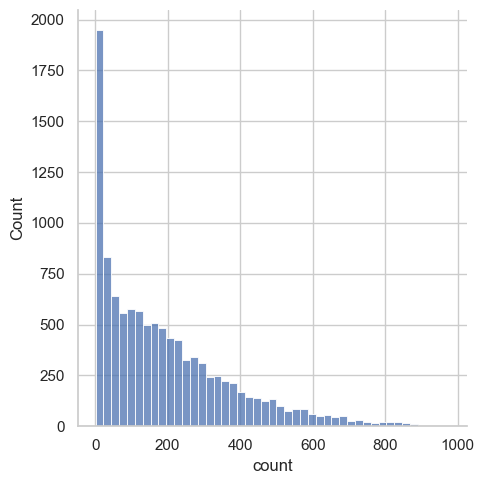

In [946]:
sn.displot(train['count'])

In [947]:
#Limpando a coluna datetima do DataFrame de treino
tr_mo['datetime'] = pd.to_datetime(tr_mo['datetime'])

#tr_mo['year'] = tr_mo['datetime'].dt.year
#tr_mo['month'] = tr_mo['datetime'].dt.month
#tr_mo['day'] = tr_mo['datetime'].dt.day
#tr_mo['hour'] = tr_mo['datetime'].dt.hour
#tr_mo['weekday'] = tr_mo['datetime'].dt.dayofweek

#Reorganzando as novas colunas
tr_mo.insert(0, 'year', tr_mo['datetime'].dt.year)
tr_mo.insert(1, 'month', tr_mo['datetime'].dt.month)
tr_mo.insert(2, 'day', tr_mo['datetime'].dt.day)
tr_mo.insert(3, 'hour', tr_mo['datetime'].dt.hour)
tr_mo.insert(4, 'weekday', tr_mo['datetime'].dt.dayofweek)

#Excluindo a coluna datetime do DataFrame pois não será mais usado
tr_mo = tr_mo.drop(columns='datetime')

#Separando os dados por clasificação temporal e climatica
tr_time = tr_mo.drop(columns=['weather', 'temp', 'atemp', 'humidity', 'windspeed'])
tr_clima = tr_mo.drop(columns=['year', 'month', 'day', 'hour', 'weekday', 'season', 'holiday', 'workingday'])    

tr_mo.head()

,year,month,day,hour,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011,1,1,0,5,1,0,0,1,9.84,14.395,81,0.0,16
1,2011,1,1,1,5,1,0,0,1,9.02,13.635,80,0.0,40
2,2011,1,1,2,5,1,0,0,1,9.02,13.635,80,0.0,32
3,2011,1,1,3,5,1,0,0,1,9.84,14.395,75,0.0,13
4,2011,1,1,4,5,1,0,0,1,9.84,14.395,75,0.0,1


<AxesSubplot: >

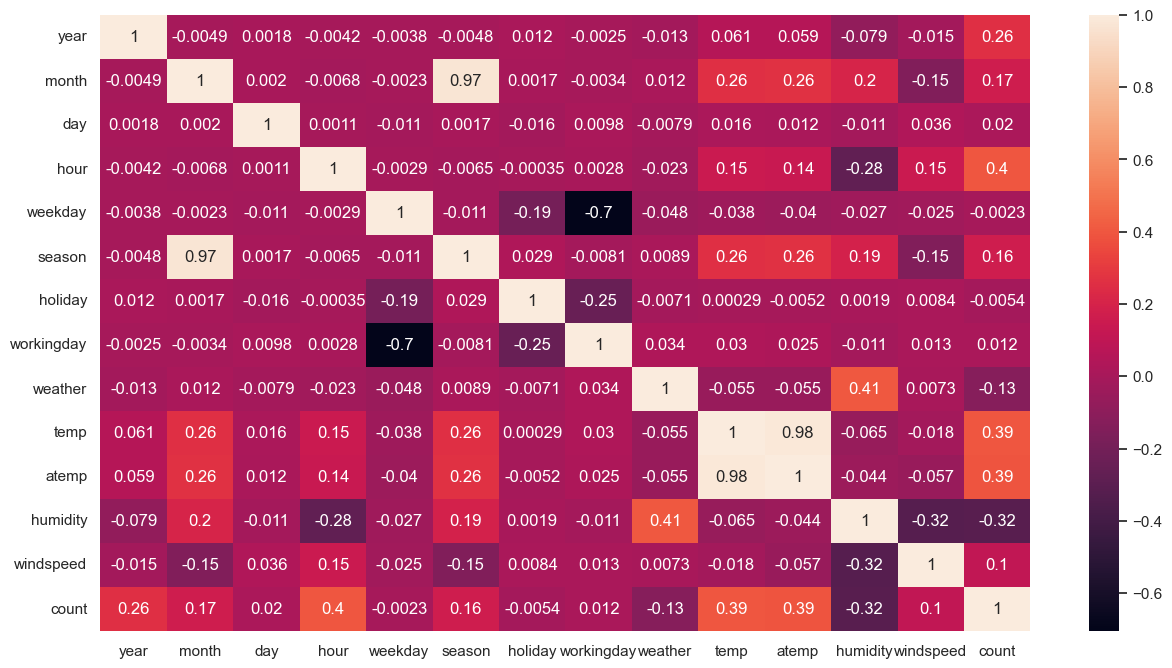

In [948]:
#Heatmap de todos os dados
correlacao = tr_mo.corr()
sn.set(rc = {'figure.figsize':(15,8)})
plt.figure()
sn.heatmap(data=correlacao, annot=True)

In [949]:
tr_time.head()

,year,month,day,hour,weekday,season,holiday,workingday,count
0,2011,1,1,0,5,1,0,0,16
1,2011,1,1,1,5,1,0,0,40
2,2011,1,1,2,5,1,0,0,32
3,2011,1,1,3,5,1,0,0,13
4,2011,1,1,4,5,1,0,0,1


<AxesSubplot: >

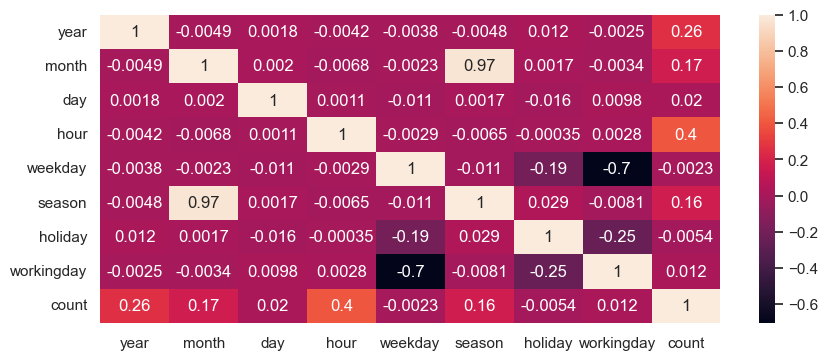

In [950]:
#Heatmap dos dados temporais
correlacao = tr_time.corr()
sn.set(rc = {'figure.figsize':(10,4)})
plt.figure()
sn.heatmap(data=correlacao, annot=True)

<AxesSubplot: xlabel='weekday', ylabel='count'>

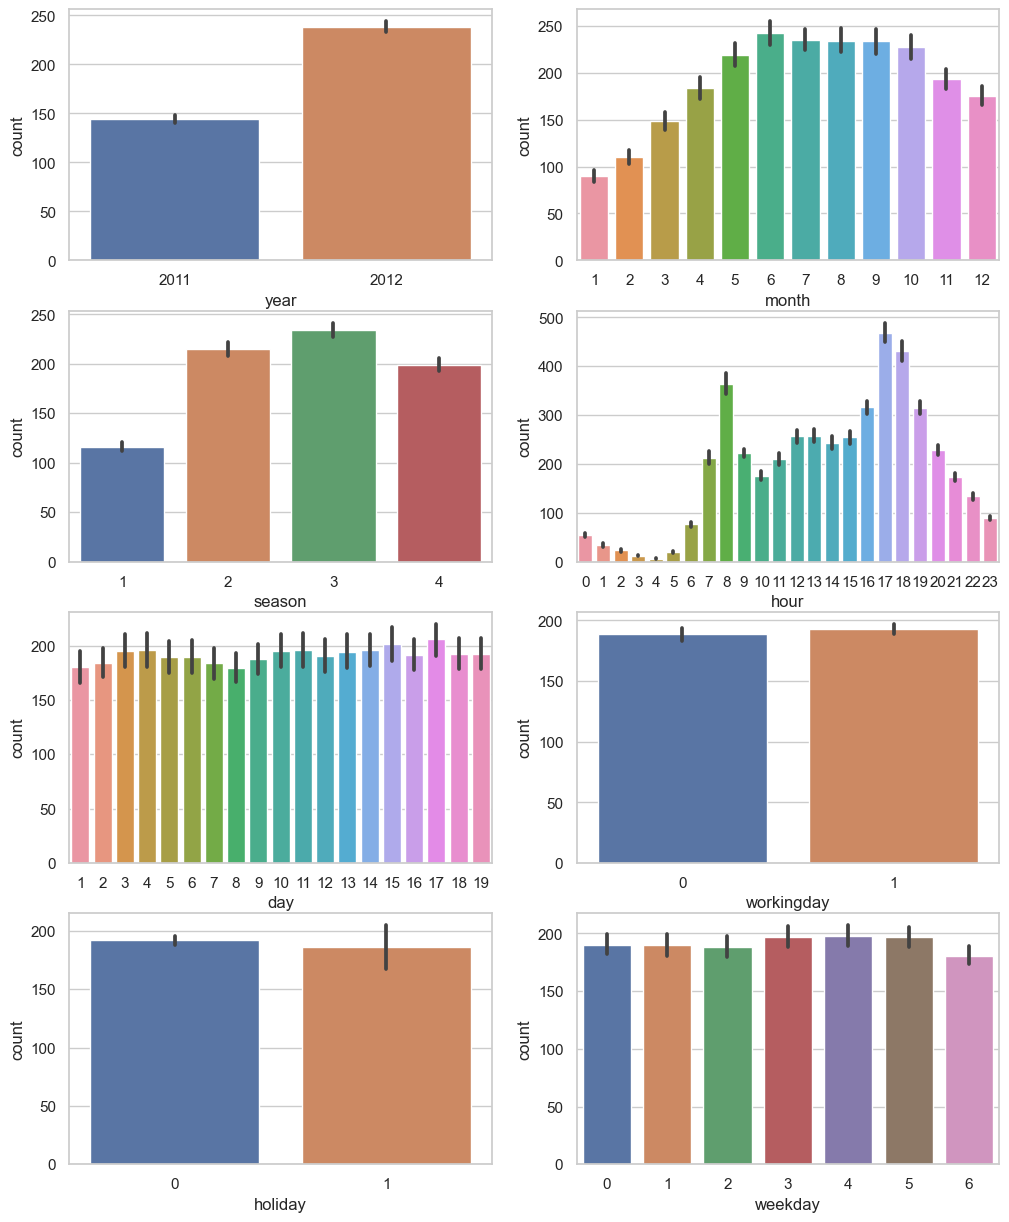

In [951]:
#Relação entre cada dado temporal com o número de bicicletas alugadas 
sn.set_theme(style="whitegrid")

plot0, axes = plt.subplots(4, 2, figsize=(12,15))

sn.barplot(x='year', y='count', data=tr_time, ax=axes[0, 0])
sn.barplot(x='month', y='count', data=tr_time, ax=axes[0, 1])
sn.barplot(x='season', y='count', data=tr_time, ax=axes[1, 0])
sn.barplot(x='hour', y='count', data=tr_time, ax=axes[1, 1])
sn.barplot(x='day', y='count', data=tr_time, ax=axes[2, 0])
sn.barplot(x='workingday', y='count', data=tr_time, ax=axes[2, 1])
sn.barplot(x='holiday', y='count', data=tr_time, ax=axes[3, 0])
sn.barplot(x='weekday', y='count', data=tr_time, ax=axes[3, 1])

In [952]:
tr_clima.head()

,weather,temp,atemp,humidity,windspeed,count
0,1,9.84,14.395,81,0.0,16
1,1,9.02,13.635,80,0.0,40
2,1,9.02,13.635,80,0.0,32
3,1,9.84,14.395,75,0.0,13
4,1,9.84,14.395,75,0.0,1


<AxesSubplot: >

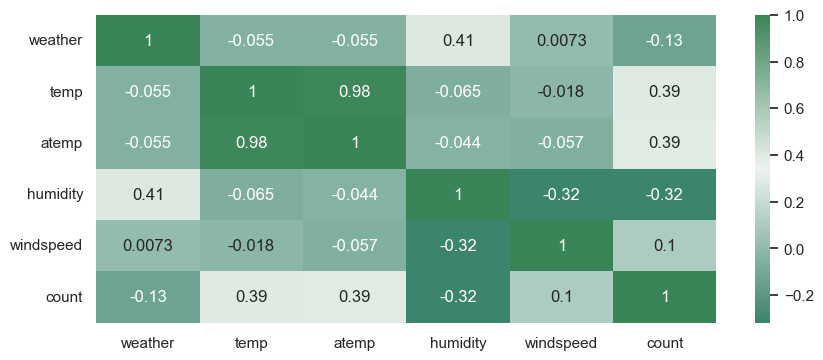

In [953]:
#Heatmap dos dados climaticos
correlacao = tr_clima.corr()
sn.set(rc = {'figure.figsize':(10,4)})
plt.figure()
sn.heatmap(data=correlacao, annot=True, cmap = sn.diverging_palette(160, 140, as_cmap=True))

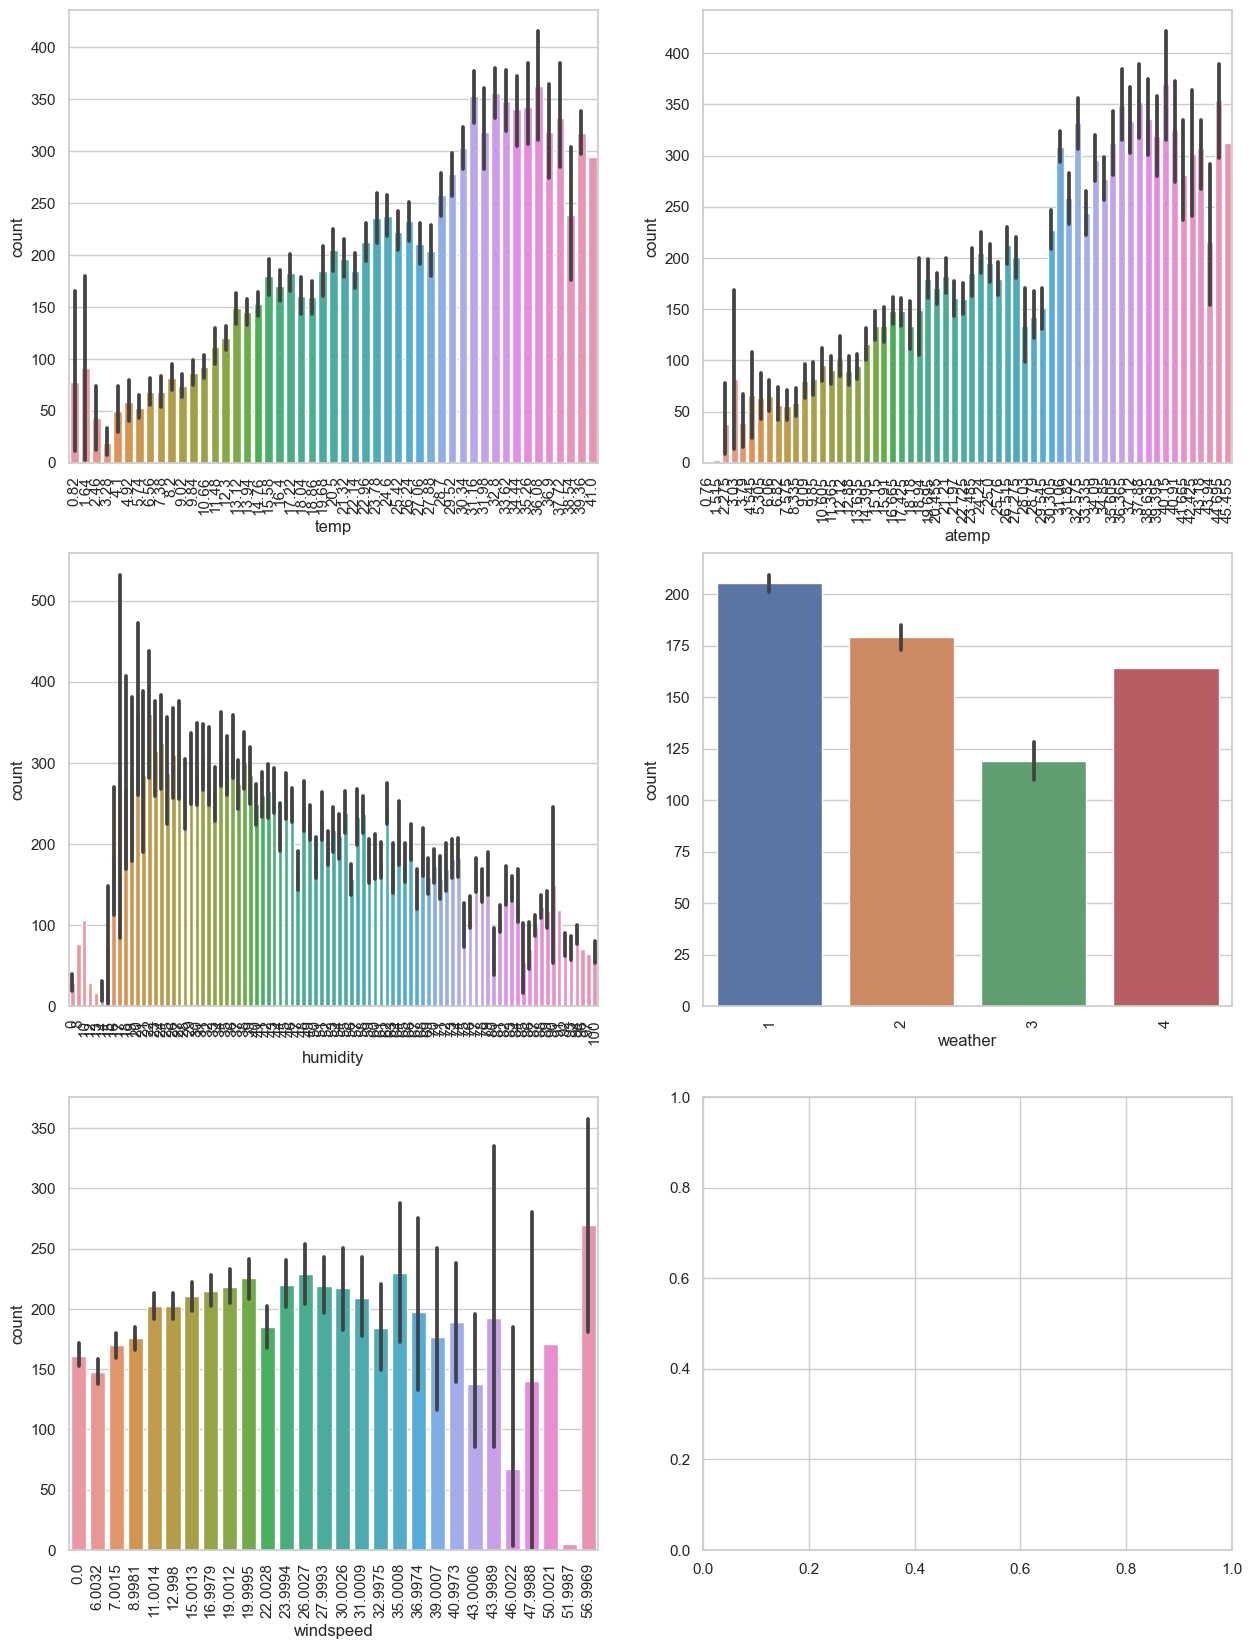

In [954]:
#Relação entre cada dado climatico com o número de bicicletas alugadas 
sn.set_theme(style="whitegrid")

plot0, axes = plt.subplots(3, 2, figsize=(15,20))


sn.barplot(x='temp', y='count', data=tr_clima, ax=axes[0, 0]).tick_params(axis='x', labelrotation=90)
sn.barplot(x='atemp', y='count', data=tr_clima, ax=axes[0, 1]).tick_params(axis='x', labelrotation=90)
sn.barplot(x='humidity', y='count', data=tr_clima, ax=axes[1, 0]).tick_params(axis='x', labelrotation=90)
sn.barplot(x='weather', y='count', data=tr_clima, ax=axes[1, 1]).tick_params(axis='x', labelrotation=90)
sn.barplot(x='windspeed', y='count', data=tr_clima, ax=axes[2, 0]).tick_params(axis='x', labelrotation=90)

In [955]:
#Função de padronização dos dados
def padr(df):
    scaler_standard = StandardScaler()
    return pd.DataFrame(scaler_standard.fit_transform(df))

#Função de normalização dos dados
def norm(df):
    scaler_minmax = MinMaxScaler()
    return pd.DataFrame(scaler_minmax.fit_transform(df))

In [956]:
#Função para criação e teste do modelo por meio de Decision Tree
def tree(df):
    num_col = df.shape[1]
    ult_col = int(num_col) - 1
    
    y = df[ult_col]
    X = df.drop(columns=ult_col)

    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

    bike_model = DecisionTreeRegressor(random_state=1)
    bike_model.fit(train_X, train_y)

    predict = bike_model.predict(val_X)
    mae = mean_absolute_error(predict, val_y)
    r2 = r2_score(val_y, predict)

    return predict, mae, r2

In [957]:
#Por arvore de decisão
#Sem número máximo de nós
#Geral

print('Standardized: ')
pred_tp_mo, mae_tp_mo, r2_tp_mo = tree(padr(tr_mo))

print('Prediction: ', pred_tp_mo)
print('Mean absolute error: ', mae_tp_mo)
print('Accuracy: ', r2_tp_mo)
    
print('\n')

print('Normalized: ')
pred_tn_mo, mae_tn_mo, r2_tn_mo = tree(norm(tr_mo))

print('Prediction: ', pred_tn_mo)
print('Mean absolute error: ', mae_tn_mo)
print('Accuracy: ', r2_tn_mo)

Standardized: 
Prediction:  [ 0.72004335 -1.04106303  2.64677101 ... -0.9692938  -1.03002161
 -0.96377309]
Mean absolute error:  0.18867562685856365
Accuracy:  0.9033644283152518


Normalized: 
Prediction:  [0.32889344 0.00204918 0.5727459  ... 0.01536885 0.00409836 0.01741803]
Mean absolute error:  0.0345635441635249
Accuracy:  0.9077437680170427


In [958]:
#Por arvore de decisão
#Sem número máximo de nós
#time

print('Standardized: ')
pred_tp_time, mae_tp_time, r2_tp_time = tree(padr(tr_time))

print('Prediction: ', pred_tp_time)
print('Mean absolute error: ', mae_tp_time)
print('Accuracy: ', r2_tp_time)
    
print('\n')

print('Normalized: ')
pred_tn_time, mae_tn_time, r2_tn_time = tree(norm(tr_time))

print('Prediction: ', pred_tn_time)
print('Mean absolute error: ', mae_tn_time)
print('Accuracy: ', r2_tn_time)

Standardized: 
Prediction:  [ 0.72004335 -1.04106303  2.64677101 ... -0.88096245 -1.01898019
 -0.96377309]
Mean absolute error:  0.20751945982257314
Accuracy:  0.8653097792182078


Normalized: 
Prediction:  [0.32889344 0.00204918 0.68647541 ... 0.0317623  0.00614754 0.01639344]
Mean absolute error:  0.03876014803483457
Accuracy:  0.8642210278340943


In [959]:
#Por arvore de decisão
#Sem número máximo de nós
#clima

print('Standardized: ')
pred_tp_clima, mae_tp_clima, r2_tp_clima = tree(padr(tr_clima))

print('Prediction: ', pred_tp_clima)
print('Mean absolute error: ', mae_tp_clima)
print('Accuracy: ', r2_tp_clima)
    
print('\n')

print('Normalized: ')
pred_tn_clima, mae_tn_clima, r2_tn_clima = tree(norm(tr_clima))

print('Prediction: ', pred_tn_clima)
print('Mean absolute error: ', mae_tn_clima)
print('Accuracy: ', r2_tn_clima)

Standardized: 
Prediction:  [-0.42274355 -0.89200387  1.48742199 ... -1.03554232 -0.6417317
 -0.11910452]
Mean absolute error:  0.8012894226802385
Accuracy:  -0.2373347670533823


Normalized: 
Prediction:  [0.11680328 0.02971311 0.47131148 ... 0.00307377 0.0761612  0.17315574]
Mean absolute error:  0.14877449251222152
Accuracy:  -0.23574012692778057


In [960]:
#Função para tester o melhor número de nós 
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [961]:
#Função para criação e teste do modelo por meio de Max Leaf Nodes
def max_nodes(df):
    num_col = df.shape[1]
    ult_col = int(num_col) - 1
    
    y = df[ult_col]
    X = df.drop(columns=ult_col)

    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

    candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
    ultimo_ema = 100000000
    
    #Testando o melhor número de nós
    for max_leaf_nodes in candidate_max_leaf_nodes:
        leaf_nodes_test = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)

        if(leaf_nodes_test < ultimo_ema):
            mmelhor_n_no = max_leaf_nodes

        print('numero de nos: ', max_leaf_nodes, '\t\t Erro medio absoluto: ', leaf_nodes_test)
        ultimo_ema = leaf_nodes_test
        
    print(mmelhor_n_no)

    bike_model = DecisionTreeRegressor(max_leaf_nodes = mmelhor_n_no, random_state=1)
    bike_model.fit(train_X, train_y)

    predict = bike_model.predict(val_X)
    mae = mean_absolute_error(predict, val_y)
    r2 = r2_score(val_y, predict)

    return predict, mae, r2

In [962]:
#Por arvore de decisão
#com número máximo de nós
#geral

print('Standardized: ')
pred_np_mo, mae_np_mo, r2_np_mo = max_nodes(padr(tr_mo))

print('Prediction: ', pred_np_mo)
print('Mean absolute error: ', mae_np_mo)
print('Accuracy: ', r2_np_mo)
    
print('\n')

print('Normalized: ')
pred_nn_mo, mae_nn_mo, r2_nn_mo = max_nodes(norm(tr_mo))

print('Prediction: ', pred_nn_mo)
print('Mean absolute error: ', mae_nn_mo)
print('Accuracy: ', r2_nn_mo)

Standardized: 
numero de nos:  5 		 Erro medio absoluto:  0.5298920702601666
numero de nos:  25 		 Erro medio absoluto:  0.35607555870121477
numero de nos:  50 		 Erro medio absoluto:  0.2939430491320725
numero de nos:  100 		 Erro medio absoluto:  0.24441474453667977
numero de nos:  250 		 Erro medio absoluto:  0.1959751393559959
numero de nos:  500 		 Erro medio absoluto:  0.18221218259071836
500
Prediction:  [ 0.8604764  -1.00938727  2.34037163 ... -0.92387734 -0.93118744
 -1.02119161]
Mean absolute error:  0.18243850911869366
Accuracy:  0.914474665507106


Normalized: 
numero de nos:  5 		 Erro medio absoluto:  0.09834282870757155
numero de nos:  25 		 Erro medio absoluto:  0.06608417004450265
numero de nos:  50 		 Erro medio absoluto:  0.05455297890452261
numero de nos:  100 		 Erro medio absoluto:  0.045361005956881244
numero de nos:  250 		 Erro medio absoluto:  0.03650242688381218
numero de nos:  500 		 Erro medio absoluto:  0.033824927689255546
500
Prediction:  [0.35495645 0.0

In [963]:
#Por arvore de decisão
#com número máximo de nós
#time

print('Standardized: ')
pred_np_time, mae_np_time, r2_np_time = max_nodes(padr(tr_time))

print('Prediction: ', pred_np_time)
print('Mean absolute error: ', mae_np_time)
print('Accuracy: ', r2_np_time)
    
print('\n')

print('Normalized: ')
pred_nn_time, mae_nn_time, r2_nn_time = max_nodes(norm(tr_time))

print('Prediction: ', pred_nn_time)
print('Mean absolute error: ', mae_nn_time)
print('Accuracy: ', r2_nn_time)

Standardized: 
numero de nos:  5 		 Erro medio absoluto:  0.5106104042057632
numero de nos:  25 		 Erro medio absoluto:  0.3404127327944799
numero de nos:  50 		 Erro medio absoluto:  0.2758612415953333
numero de nos:  100 		 Erro medio absoluto:  0.24375191431796975
numero de nos:  250 		 Erro medio absoluto:  0.21537156927598414
numero de nos:  500 		 Erro medio absoluto:  0.20276620981588042
500
Prediction:  [ 0.78588292 -1.00938727  2.64677101 ... -0.92387734 -0.93118744
 -1.02119161]
Mean absolute error:  0.2012896937898553
Accuracy:  0.8828677332120516


Normalized: 
numero de nos:  5 		 Erro medio absoluto:  0.09476433850473873
numero de nos:  25 		 Erro medio absoluto:  0.0631773014731986
numero de nos:  50 		 Erro medio absoluto:  0.05119717080489255
numero de nos:  100 		 Erro medio absoluto:  0.045237991097215956
numero de nos:  250 		 Erro medio absoluto:  0.040003451687370926
numero de nos:  500 		 Erro medio absoluto:  0.037704669175264126
500
Prediction:  [0.34111263 0.0

In [964]:
#Por arvore de decisão
#com número máximo de nós
#clima

print('Standardized: ')
pred_np_clima, mae_np_clima, r2_np_clima = max_nodes(padr(tr_clima))

print('Prediction: ', pred_np_clima)
print('Mean absolute error: ', mae_np_clima)
print('Accuracy: ', r2_np_clima)
    
print('\n')

print('Normalized: ')
pred_nn_clima, mae_nn_clima, r2_nn_clima = max_nodes(norm(tr_clima))

print('Prediction: ', pred_nn_clima)
print('Mean absolute error: ', mae_nn_clima)
print('Accuracy: ', r2_nn_clima)

Standardized: 
numero de nos:  5 		 Erro medio absoluto:  0.6742921469222652
numero de nos:  25 		 Erro medio absoluto:  0.6468261247352264
numero de nos:  50 		 Erro medio absoluto:  0.6415097899580782
numero de nos:  100 		 Erro medio absoluto:  0.651163291216612
numero de nos:  250 		 Erro medio absoluto:  0.6658811245362708
numero de nos:  500 		 Erro medio absoluto:  0.691085558871806
50
Prediction:  [ 0.40069751 -0.58953215  1.33921385 ... -0.38098354 -0.65739148
 -0.65739148]
Mean absolute error:  0.6415097899580782
Accuracy:  0.2670084644977674


Normalized: 
numero de nos:  5 		 Erro medio absoluto:  0.1251420823698668
numero de nos:  25 		 Erro medio absoluto:  0.12004465505057865
numero de nos:  50 		 Erro medio absoluto:  0.11905799488016978
numero de nos:  100 		 Erro medio absoluto:  0.12032010657451389
numero de nos:  250 		 Erro medio absoluto:  0.1230515936873351
numero de nos:  500 		 Erro medio absoluto:  0.12819114827341668
50
Prediction:  [0.26962595 0.08584893 0.4

In [965]:
#Função para criação e teste do modelo por meio de Random Forest
def forest(df):
    num_col = df.shape[1]
    ult_col = int(num_col) - 1
    
    y = df[ult_col]
    X = df.drop(columns=ult_col)

    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

    bike_model = RandomForestRegressor(random_state=1)
    bike_model.fit(train_X, train_y)

    predict = bike_model.predict(val_X)
    mae = mean_absolute_error(predict, val_y)
    r2 = r2_score(val_y, predict)

    return predict, mae, r2

In [966]:
#Por floresta
#Geral

print('Standardized: ')
pred_fp_mo, mae_fp_mo, r2_fp_mo = forest(padr(tr_mo))

print('Prediction: ', pred_fp_mo)
print('Mean absolute error: ', mae_fp_mo)
print('Accuracy: ', r2_fp_mo)
    
print('\n')

print('Normalized: ')
pred_fn_mo, mae_fn_mo, r2_fn_mo = forest(norm(tr_mo))

print('Prediction: ', pred_fn_mo)
print('Mean absolute error: ', mae_fn_mo)
print('Accuracy: ', r2_fn_mo)

Standardized: 
Prediction:  [ 0.58213602 -1.02461131  2.00084799 ... -0.93213943 -0.98232268
 -0.99744942]
Mean absolute error:  0.135762768575482
Accuracy:  0.9545819084880675


Normalized: 
Prediction:  [0.30188525 0.00470287 0.56836066 ... 0.0217623  0.01280738 0.01038934]
Mean absolute error:  0.025237406047867415
Accuracy:  0.954344539930465


In [967]:
#Por floresta
#time

print('Standardized: ')
pred_fp_time, mae_fp_time, r2_fp_time = forest(padr(tr_time))

print('Prediction: ', pred_fp_time)
print('Mean absolute error: ', mae_fp_time)
print('Accuracy: ', r2_fp_time)
    
print('\n')

print('Normalized: ')
pred_fn_time, mae_fn_time, r2_fn_time = forest(norm(tr_time))

print('Prediction: ', pred_fn_time)
print('Mean absolute error: ', mae_fn_time)
print('Accuracy: ', r2_fn_time)

Standardized: 
Prediction:  [ 0.59383993 -1.0283654   1.54616234 ... -0.91182322 -0.97288227
 -0.97685718]
Mean absolute error:  0.15563576160417003
Accuracy:  0.9309243352864962


Normalized: 
Prediction:  [0.30927254 0.00428279 0.5027459  ... 0.02594262 0.01468238 0.01371926]
Mean absolute error:  0.02885536114356609
Accuracy:  0.9307994654967034


In [968]:
#Por floresta
#clima

print('Standardized: ')
pred_fp_clima, mae_fp_clima, r2_fp_clima = forest(padr(tr_clima))

print('Prediction: ', pred_fp_clima)
print('Mean absolute error: ', mae_fp_clima)
print('Accuracy: ', r2_fp_clima)
    
print('\n')

print('Normalized: ')
pred_fn_clima, mae_fn_clima, r2_fn_clima = forest(norm(tr_clima))

print('Prediction: ', pred_fn_clima)
print('Mean absolute error: ', mae_fn_clima)
print('Accuracy: ', r2_fn_clima)

Standardized: 
Prediction:  [-0.21253208 -0.30360663  1.20658993 ... -0.91814443 -0.64143612
 -0.69977828]
Mean absolute error:  0.6851891714864903
Accuracy:  0.14743906981436572


Normalized: 
Prediction:  [0.15581649 0.14563952 0.42194279 ... 0.02516393 0.07514024 0.06525854]
Mean absolute error:  0.1269686056111332
Accuracy:  0.1491311101820063


Text(0.5, 1.0, 'Clima Table Random Forest')

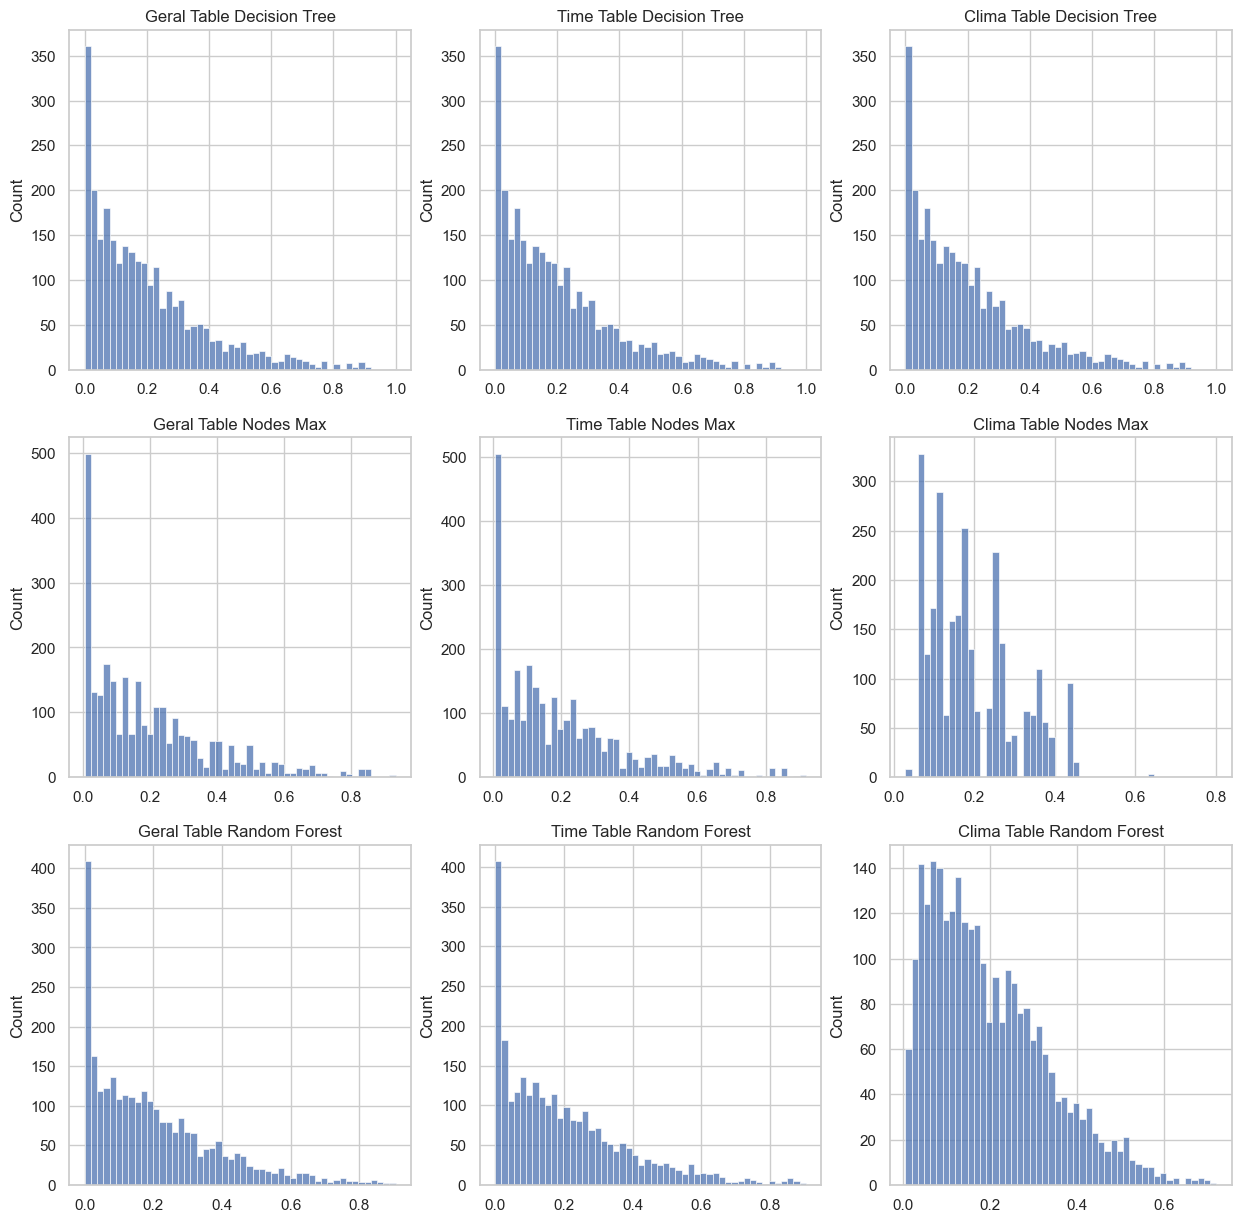

In [969]:
#Normalizado

sn.set_theme(style="whitegrid")

plot0, axes = plt.subplots(3, 3, figsize=(15,15))

sn.histplot(pred_tn_clima, bins=50, ax=axes[0, 0])
axes[0, 0].set_title('Geral Table Decision Tree')

sn.histplot(pred_tn_clima, bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Time Table Decision Tree')

sn.histplot(pred_tn_clima, bins=50, ax=axes[0, 2])
axes[0, 2].set_title('Clima Table Decision Tree')

sn.histplot(pred_nn_mo, bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Geral Table Nodes Max')

sn.histplot(pred_nn_time, bins=50, ax=axes[1, 1])
axes[1, 1].set_title('Time Table Nodes Max')

sn.histplot(pred_nn_clima, bins=50, ax=axes[1, 2])
axes[1, 2].set_title('Clima Table Nodes Max')

sn.histplot(pred_fn_mo, bins=50, ax=axes[2, 0])
axes[2, 0].set_title('Geral Table Random Forest')

sn.histplot(pred_fn_time, bins=50, ax=axes[2, 1])
axes[2, 1].set_title('Time Table Random Forest')

sn.histplot(pred_fn_clima, bins=50, ax=axes[2, 2])
axes[2, 2].set_title('Clima Table Random Forest')

Text(0.5, 1.0, 'Clima Table Random Forest')

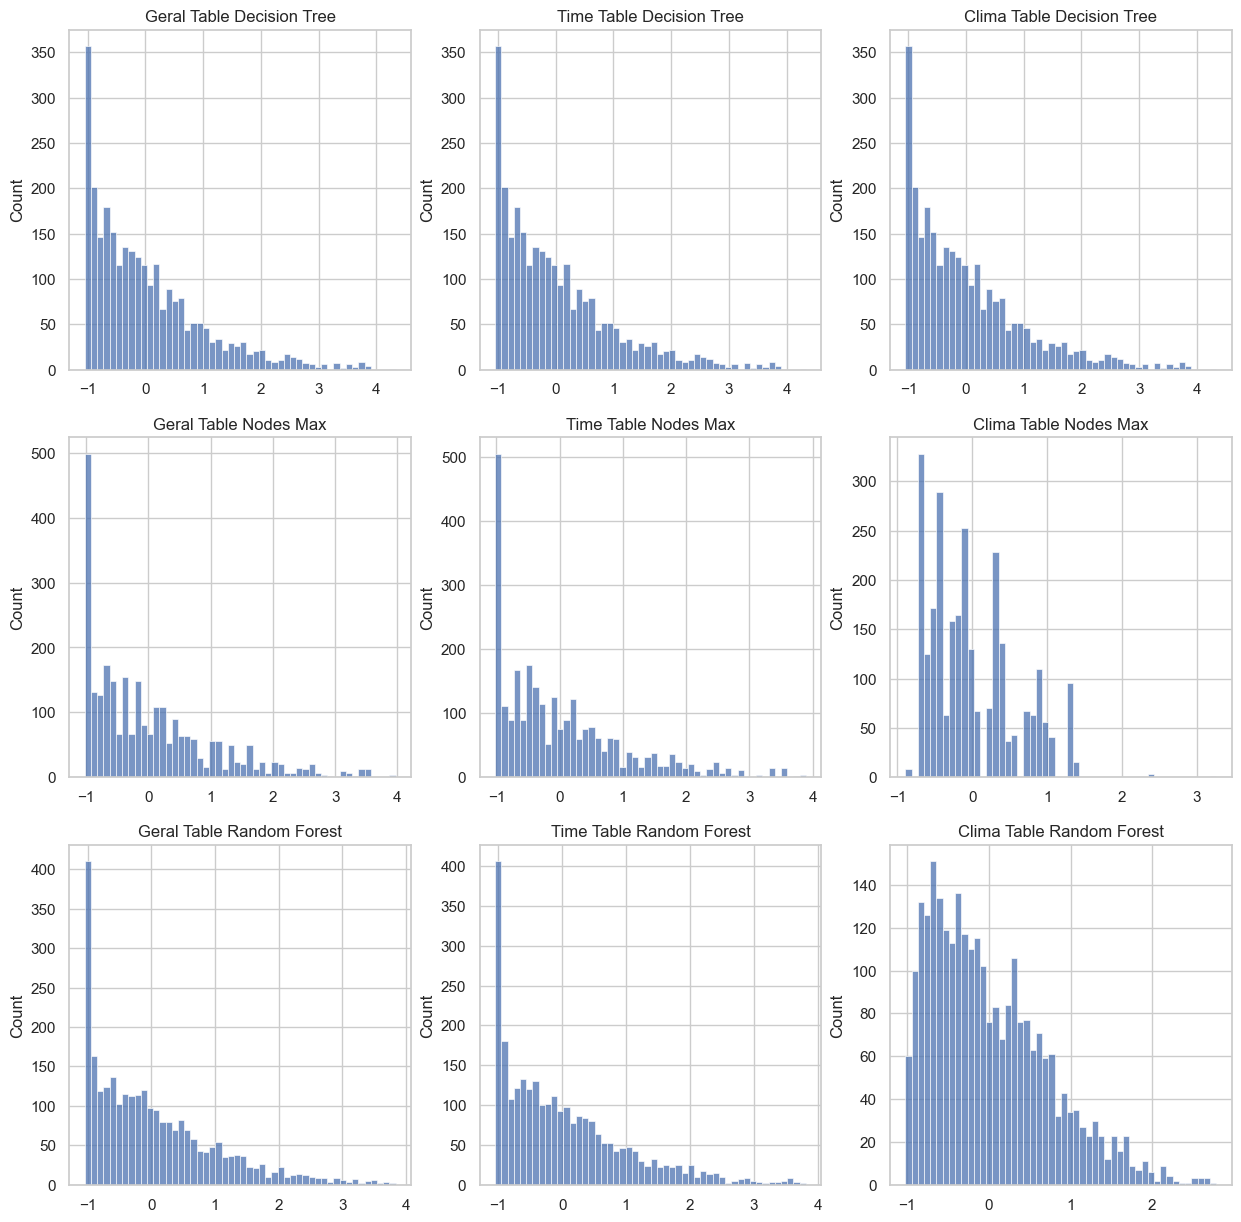

In [970]:
#Padronizado

sn.set_theme(style="whitegrid")

plot0, axes = plt.subplots(3, 3, figsize=(15,15))

sn.histplot(pred_tp_clima, bins=50, ax=axes[0, 0])
axes[0, 0].set_title('Geral Table Decision Tree')

sn.histplot(pred_tp_clima, bins=50, ax=axes[0, 1])
axes[0, 1].set_title('Time Table Decision Tree')

sn.histplot(pred_tp_clima, bins=50, ax=axes[0, 2])
axes[0, 2].set_title('Clima Table Decision Tree')

sn.histplot(pred_np_mo, bins=50, ax=axes[1, 0])
axes[1, 0].set_title('Geral Table Nodes Max')

sn.histplot(pred_np_time, bins=50, ax=axes[1, 1])
axes[1, 1].set_title('Time Table Nodes Max')

sn.histplot(pred_np_clima, bins=50, ax=axes[1, 2])
axes[1, 2].set_title('Clima Table Nodes Max')

sn.histplot(pred_fp_mo, bins=50, ax=axes[2, 0])
axes[2, 0].set_title('Geral Table Random Forest')

sn.histplot(pred_fp_time, bins=50, ax=axes[2, 1])
axes[2, 1].set_title('Time Table Random Forest')

sn.histplot(pred_fp_clima, bins=50, ax=axes[2, 2])
axes[2, 2].set_title('Clima Table Random Forest')

In [971]:
#Tabela das precisões de acordo com o dados usados
acuracias = [['Geral Decision Tree', r2_tn_mo, r2_tp_mo],
             ['Time Decision Tree', r2_tn_time, r2_tp_mo],
             ['Clima Decision Tree', r2_tn_clima, r2_tp_mo],
             ['Geral Nodes Max', r2_nn_mo, r2_np_mo],
             ['Time Nodes Max', r2_nn_time, r2_np_time],
             ['Clima Nodes Max', r2_nn_clima, r2_np_clima],
             ['Geral Random Forest', r2_fn_mo, r2_fp_mo],
             ['Time Random Forest', r2_fn_time, r2_fp_time],
             ['Clima Random Forest', r2_fn_clima, r2_fp_clima]]

accuracy = pd.DataFrame(acuracias, columns=['Table', 'Normalized', 'Standardized'])
accuracy

,Table,Normalized,Standardized
0,Geral Decision Tree,0.907744,0.903364
1,Time Decision Tree,0.864221,0.903364
2,Clima Decision Tree,-0.235740,0.903364
3,Geral Nodes Max,0.914673,0.914475
4,Time Nodes Max,0.880662,0.882868
5,Clima Nodes Max,0.267008,0.267008
6,Geral Random Forest,0.954345,0.954582
7,Time Random Forest,0.930799,0.930924
8,Clima Random Forest,0.149131,0.147439


In [972]:
accuracy.groupby(['Normalized']).Table.max()

Normalized
-0.235740    Clima Decision Tree
 0.149131    Clima Random Forest
 0.267008        Clima Nodes Max
 0.864221     Time Decision Tree
 0.880662         Time Nodes Max
 0.907744    Geral Decision Tree
 0.914673        Geral Nodes Max
 0.930799     Time Random Forest
 0.954345    Geral Random Forest
Name: Table, dtype: object

In [973]:
accuracy.groupby(['Standardized']).Table.max()

Standardized
0.147439    Clima Random Forest
0.267008        Clima Nodes Max
0.882868         Time Nodes Max
0.903364     Time Decision Tree
0.914475        Geral Nodes Max
0.930924     Time Random Forest
0.954582    Geral Random Forest
Name: Table, dtype: object

In [974]:
#Limpando a coluna datetima do DataFrame de teste
ts['datetime'] = pd.to_datetime(ts['datetime'])

#Reorganzando as novas colunas
ts.insert(0, 'year', ts['datetime'].dt.year)
ts.insert(1, 'month', ts['datetime'].dt.month)
ts.insert(2, 'day', ts['datetime'].dt.day)
ts.insert(3, 'hour', ts['datetime'].dt.hour)
ts.insert(4, 'weekday', ts['datetime'].dt.dayofweek)

#Excluindo a coluna datetime do DataFrame pois não será mais usado
ts = ts.drop(columns='datetime')

ts

,year,month,day,hour,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011,1,20,0,3,1,0,1,1,10.66,11.365,56,26.0027
1,2011,1,20,1,3,1,0,1,1,10.66,13.635,56,0.0000
2,2011,1,20,2,3,1,0,1,1,10.66,13.635,56,0.0000
3,2011,1,20,3,3,1,0,1,1,10.66,12.880,56,11.0014
4,2011,1,20,4,3,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012,12,31,19,0,1,0,1,2,10.66,12.880,60,11.0014
6489,2012,12,31,20,0,1,0,1,2,10.66,12.880,60,11.0014
6490,2012,12,31,21,0,1,0,1,1,10.66,12.880,60,11.0014
6491,2012,12,31,22,0,1,0,1,1,10.66,13.635,56,8.9981


In [975]:
#scaler_standard = StandardScaler()
#mo_padr = pd.DataFrame(scaler_standard.fit_transform(tr_mo))

#num_col = mo_padr.shape[1]
#ult_col = int(num_col) - 1
    
#y = mo_padr[ult_col]
#X = mo_padr.drop(columns=ult_col)

#Recriação do modelo com maior precição
y = tr_mo['count']
X = tr_mo.drop(columns='count')

bike_model = RandomForestRegressor(random_state=1)
bike_model.fit(X, y)
#Predição com o DataFrame de teste

predict = bike_model.predict(ts)
count_pred = pd.DataFrame(predict, columns=['count'])

ts = ts.join(count_pred)

ts.iloc[:24]

,year,month,day,hour,weekday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011,1,20,0,3,1,0,1,1,10.66,11.365,56,26.0027,14.17
1,2011,1,20,1,3,1,0,1,1,10.66,13.635,56,0.0000,6.34
2,2011,1,20,2,3,1,0,1,1,10.66,13.635,56,0.0000,5.42
3,2011,1,20,3,3,1,0,1,1,10.66,12.880,56,11.0014,3.31
4,2011,1,20,4,3,1,0,1,1,10.66,12.880,56,11.0014,2.71
5,2011,1,20,5,3,1,0,1,1,9.84,11.365,60,15.0013,7.42
6,2011,1,20,6,3,1,0,1,1,9.02,10.605,60,15.0013,35.22
7,2011,1,20,7,3,1,0,1,1,9.02,10.605,55,15.0013,86.60
8,2011,1,20,8,3,1,0,1,1,9.02,10.605,55,19.0012,193.61
9,2011,1,20,9,3,1,0,1,2,9.84,11.365,52,15.0013,121.91


<AxesSubplot: >

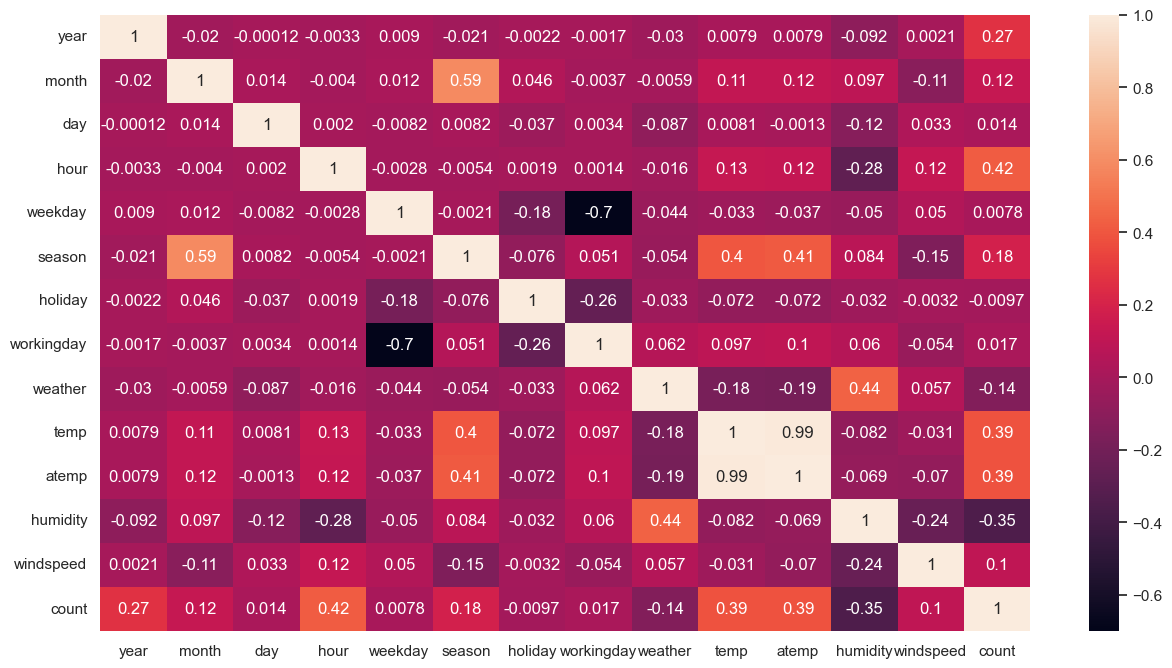

In [976]:
#Heatmap do DataFrame de teste
correlacao = ts.corr()
sn.set(rc = {'figure.figsize':(15,8)})
plt.figure()
sn.heatmap(data=correlacao, annot=True)